# Cardio Vascular Diseases Risks

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from utils import *


### Chargement du CSV

In [3]:
df = pd.read_csv('./csv/cardio_train.csv', sep=';')
print(df)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0 

### Exploration initiale

Dans un premier temps je cherche a comprendre la structure des données, vérifier les types et identifier les valeurs manquantes

In [4]:
# Affichage des premières lignes du dataset
print(df.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [5]:
# Obtention des informations sur les types de données et les valeurs manquantes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


In [70]:
# Statistiques descriptives
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC,MAP
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.303157,0.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513,107.359371
std,28851.302323,6.760171,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511,136.493690
min,0.000000,30.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784,-41.666667
25%,25006.750000,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,93.333333
50%,50001.500000,54.000000,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068,93.333333
75%,74889.250000,58.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222,103.333333
max,99999.000000,65.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667,7400.000000


### Nettoyage des données
Recherche des valeurs manquantes ou aberrantes et gestion de ces dernières

In [7]:
# Vérification des valeurs manquantes
print(df.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


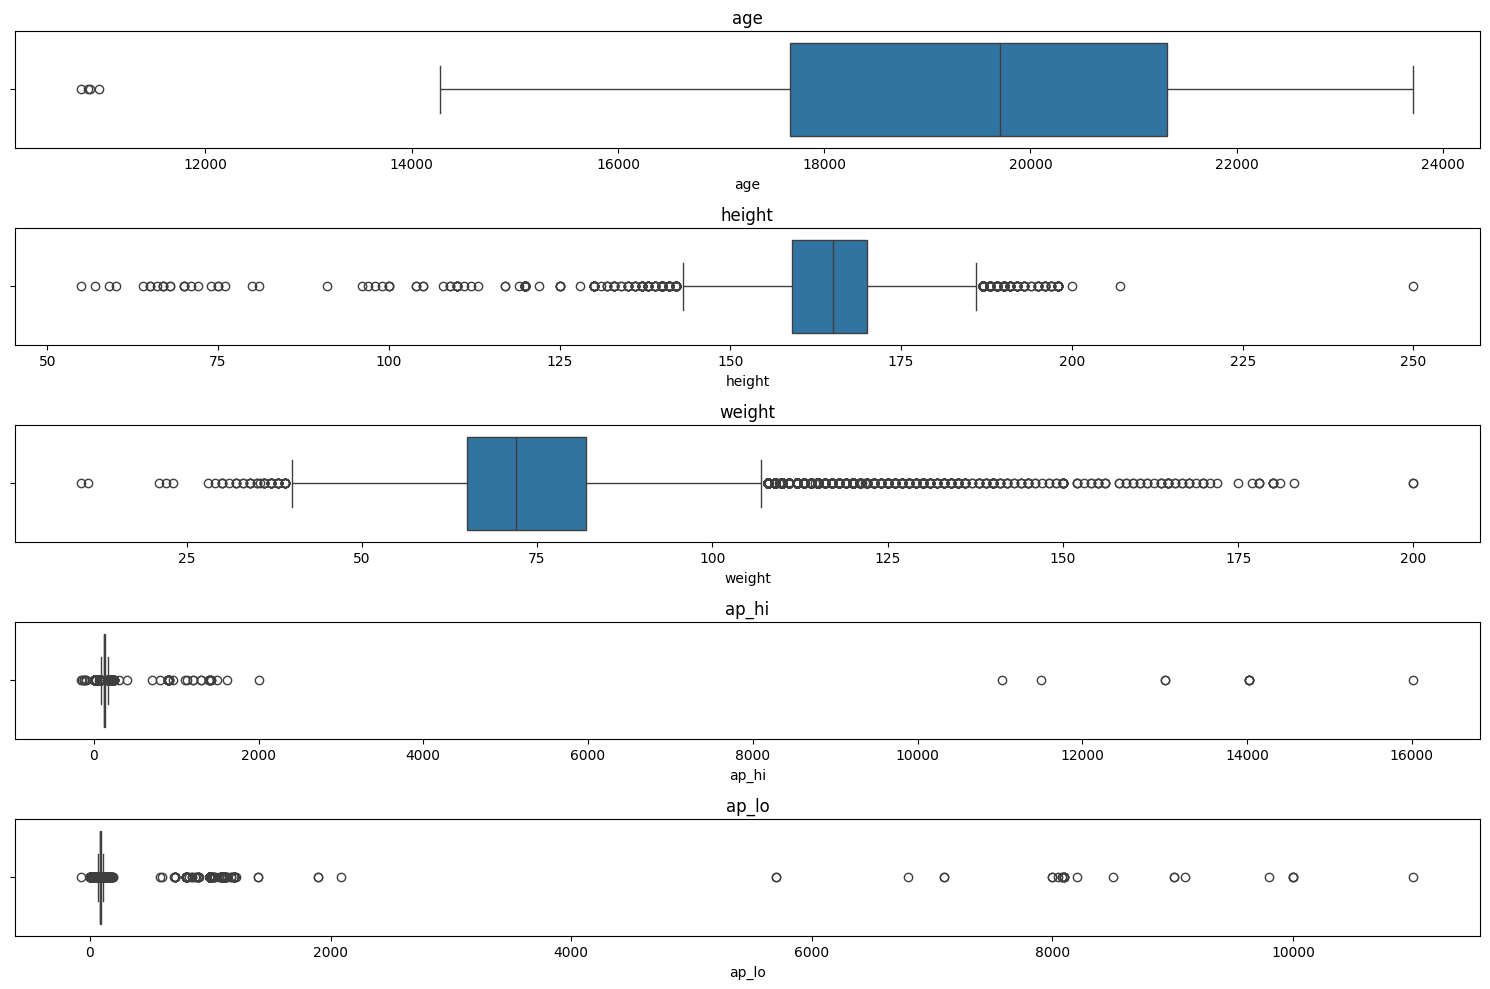

In [8]:
# Vérification des valeurs aberrantes
plt.figure(figsize = (15, 10))

numeric_vars = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

for i, var in enumerate(numeric_vars):
    plt.subplot(len(numeric_vars), 1, i + 1)
    sns.boxplot(x = df[var])
    plt.title(var)

plt.tight_layout()
plt.show()

Nous pouvons voir qu'il y a des valeurs possiblement aberrantes pour les 5 variables numériques, nous allons approfondir la recherche afin de savoir quoi faire de ces valeurs.  
Dans un premier temps, nous allons modifier le dataset afin que l'age soit en années et non en jours, cela nous permettra de faire un lien avec les valeurs possiblement aberrantes pour la taille et le poids (si une personne est un enfant, possiblement la taille et le poids ne sont pas aberrants.)

In [9]:
df['age'] = df['age'] / 365.25
df['age'] = df['age'].round(0)

print(df.head())

   id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.0       2     168    62.0    110     80            1     1      0   
1   1  55.0       1     156    85.0    140     90            3     1      0   
2   2  52.0       1     165    64.0    130     70            3     1      0   
3   3  48.0       2     169    82.0    150    100            1     1      0   
4   4  48.0       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [10]:
# Je supprime les doublons
df = df.drop_duplicates()

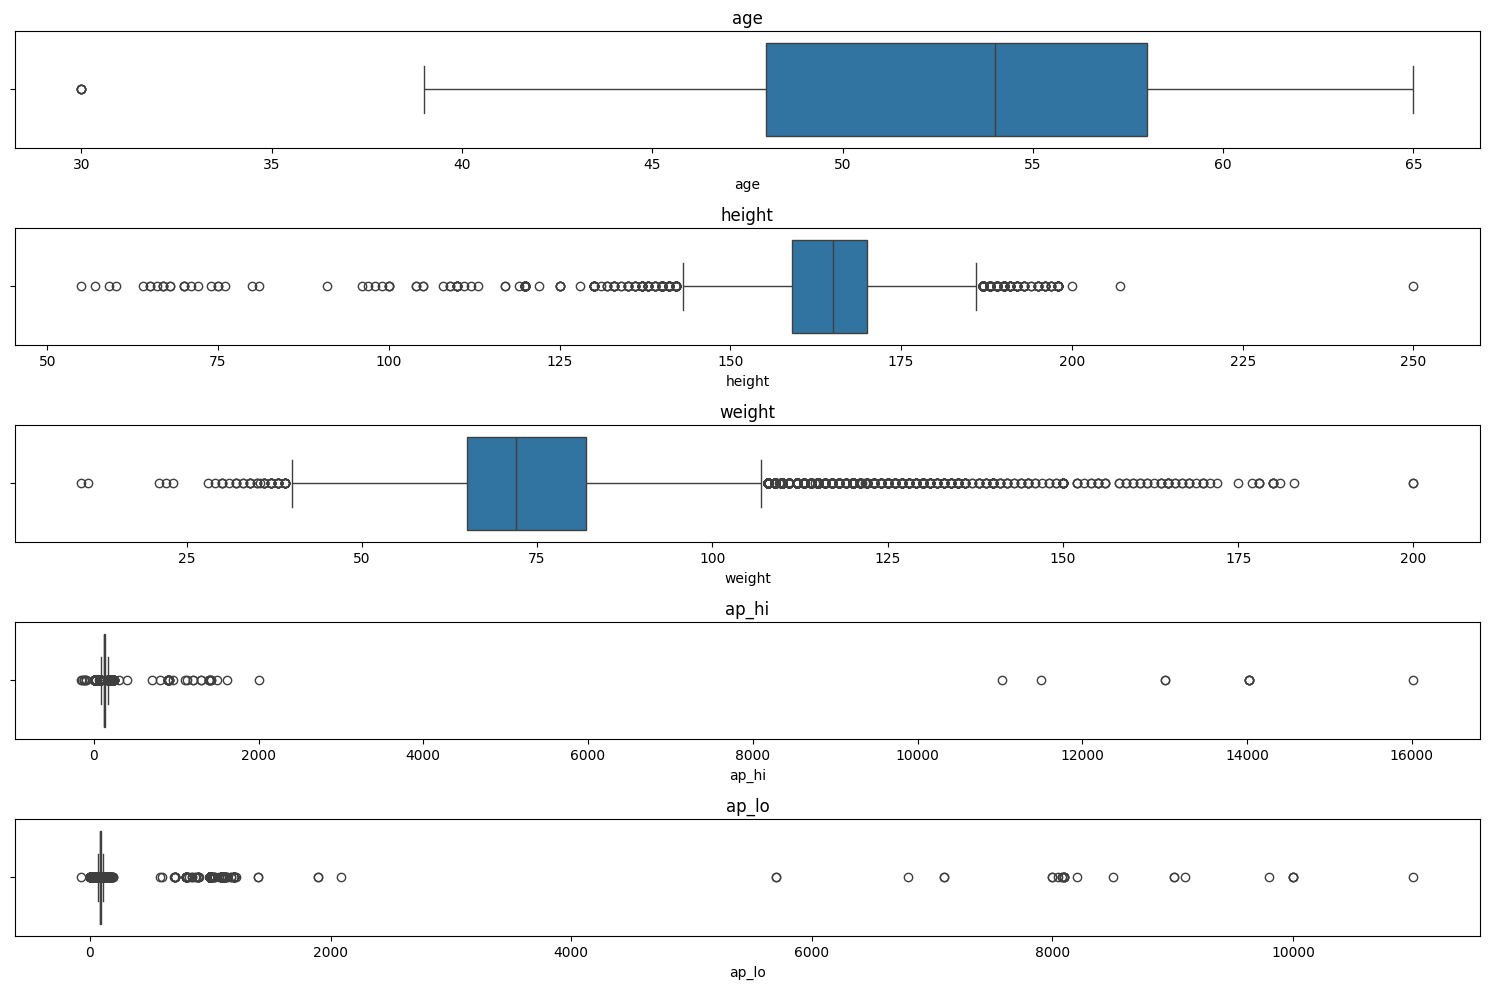

In [11]:
# Vérification des valeurs aberrantes
plt.figure(figsize = (15, 10))

numeric_vars = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

for i, var in enumerate(numeric_vars):
    plt.subplot(len(numeric_vars), 1, i + 1)
    sns.boxplot(x = df[var])
    plt.title(var)

plt.tight_layout()
plt.show()

En passant l'âge en années, on peut constater qu'il y a moins de valeurs aberrantes pour l'âge. 

Je veux maintenant ajouter deux variables à mon dataframe: 
- L'IMC
- La tension artérielle
- La MAP (Mean Arterial Pressure)


Nous pouvons créer ces variables grâce à celles déjà présentes. 
Pour l'IMC, le calcul est le suivant:  
        IMC = $\frac{Poids}{Taille \times Taille}$

Pour ce qui est de la tension artérielle, elle s'exprime juste de cette manière:  
        AT = AP_HIGH/AP_LOW

Et pour la pression artérielle moyenne (MAP), le calcul est le suivant:  
        MAP = AP_LOW + $\frac{1}{3}(AP_HIGH - AP_LOW)$

In [12]:
# Calcul de l'IMC et ajoue de celui-ci dans le dataframe
df['height'] = pd.to_numeric(df['height'], errors='coerce')
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')

df['IMC'] = df['weight'] / ((df['height'] / 100) ** 2)

print(df.head())

   id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.0       2     168    62.0    110     80            1     1      0   
1   1  55.0       1     156    85.0    140     90            3     1      0   
2   2  52.0       1     165    64.0    130     70            3     1      0   
3   3  48.0       2     169    82.0    150    100            1     1      0   
4   4  48.0       1     156    56.0    100     60            1     1      0   

   alco  active  cardio        IMC  
0     0       1       0  21.967120  
1     0       1       1  34.927679  
2     0       0       1  23.507805  
3     0       1       1  28.710479  
4     0       0       0  23.011177  


In [13]:
# Ajout de la tension artérielle dans le dataframe
df['ap_hi'] = pd.to_numeric(df['ap_hi'], errors='coerce')
df['ap_lo'] = pd.to_numeric(df['ap_lo'], errors='coerce')

df['AT'] = df['ap_hi'].astype(str) + '/' + df['ap_lo'].astype(str)

print(df.head())

   id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.0       2     168    62.0    110     80            1     1      0   
1   1  55.0       1     156    85.0    140     90            3     1      0   
2   2  52.0       1     165    64.0    130     70            3     1      0   
3   3  48.0       2     169    82.0    150    100            1     1      0   
4   4  48.0       1     156    56.0    100     60            1     1      0   

   alco  active  cardio        IMC       AT  
0     0       1       0  21.967120   110/80  
1     0       1       1  34.927679   140/90  
2     0       0       1  23.507805   130/70  
3     0       1       1  28.710479  150/100  
4     0       0       0  23.011177   100/60  


In [14]:
# Ajout de la pression artérielle moyenne dans le dataframe
df['ap_hi'] = pd.to_numeric(df['ap_hi'], errors='coerce')
df['ap_lo'] = pd.to_numeric(df['ap_lo'], errors='coerce')

df['MAP'] = df['ap_lo'] + (df['ap_hi'] - df['ap_lo']) / 3

print(df.head())

   id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.0       2     168    62.0    110     80            1     1      0   
1   1  55.0       1     156    85.0    140     90            3     1      0   
2   2  52.0       1     165    64.0    130     70            3     1      0   
3   3  48.0       2     169    82.0    150    100            1     1      0   
4   4  48.0       1     156    56.0    100     60            1     1      0   

   alco  active  cardio        IMC       AT         MAP  
0     0       1       0  21.967120   110/80   90.000000  
1     0       1       1  34.927679   140/90  106.666667  
2     0       0       1  23.507805   130/70   90.000000  
3     0       1       1  28.710479  150/100  116.666667  
4     0       0       0  23.011177   100/60   73.333333  


Maintenant je vais chercher des relations entre l'âge le poids et la taille des sujets afin de comprendre le reste des valeurs. 

Dans un premier temps je fais un scatter plot pour la relation entre ces 3 variables.

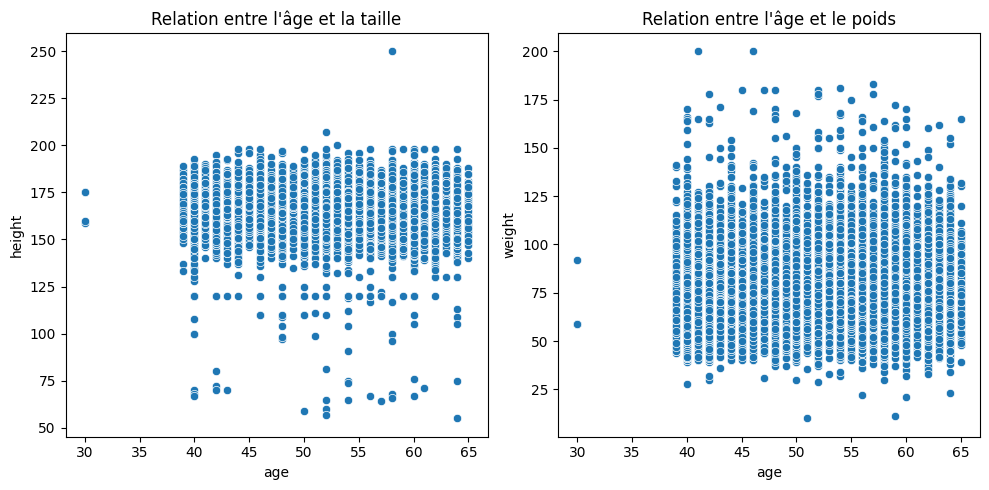

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='height', data=df)
plt.title('Relation entre l\'âge et la taille')

plt.subplot(1, 2, 2)
sns.scatterplot(x='age', y='weight', data=df)
plt.title('Relation entre l\'âge et le poids')

plt.tight_layout()
plt.show()

Je fais en suite une analyse de densité conjointe qui va combiner un scatter plot avec un histogramme et montrer la distribution des deux variables ainsi que leur relation.

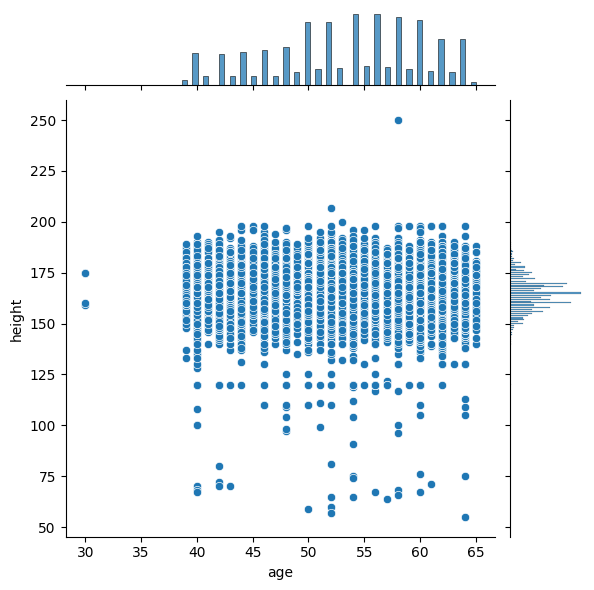

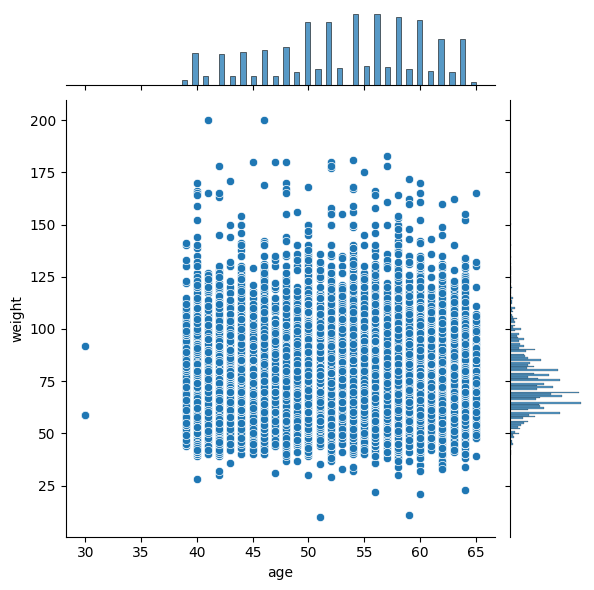

In [16]:
sns.jointplot(x='age', y='height', data=df, kind='scatter')
plt.show()

sns.jointplot(x='age', y='weight', data=df, kind='scatter')
plt.show()

Après analyse de ces résultats et après avoir fais des recherches sur internet, j'ai décidé d'enlever les valeurs inférieure à 75cm et supérieures à 230cm pour a taille et les valeurs inférieures à 30kg pour le poids. 

In [17]:
filtered_df = df[(df['height'] >= 75) & (df['height'] <= 230) & (df['weight'] >= 30)]

print(filtered_df.describe())

                 id           age        gender        height        weight  \
count  69973.000000  69973.000000  69973.000000  69973.000000  69973.000000   
mean   49971.581924     53.303503      1.349535    164.384877     74.212363   
std    28852.175055      6.759785      0.476826      8.041790     14.387141   
min        0.000000     30.000000      1.000000     75.000000     30.000000   
25%    25006.000000     48.000000      1.000000    159.000000     65.000000   
50%    50005.000000     54.000000      1.000000    165.000000     72.000000   
75%    74889.000000     58.000000      2.000000    170.000000     82.000000   
max    99999.000000     65.000000      2.000000    207.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  69973.000000  69973.000000  69973.000000  69973.000000  69973.000000   
mean     128.820445     96.623040      1.366913      1.226530      0.088134   
std      154.040199    188.470114      0.680282    

J'analyse maintenant les données afin de comprendre les relations entre les variables

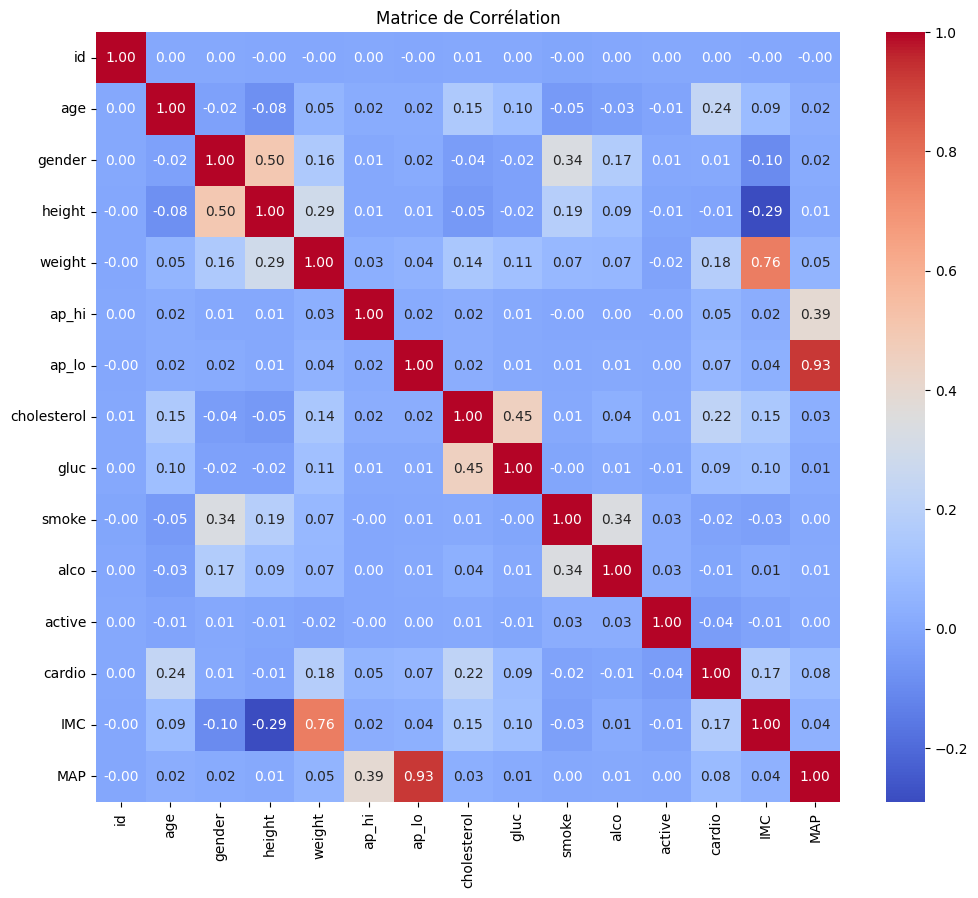

In [18]:
corr_df = df.drop(columns=['AT'])

correlation_matrix = corr_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

Ci-dessous, je cherche a visualiser la distribution des données pour les variables d'âge, de poids et de taille.

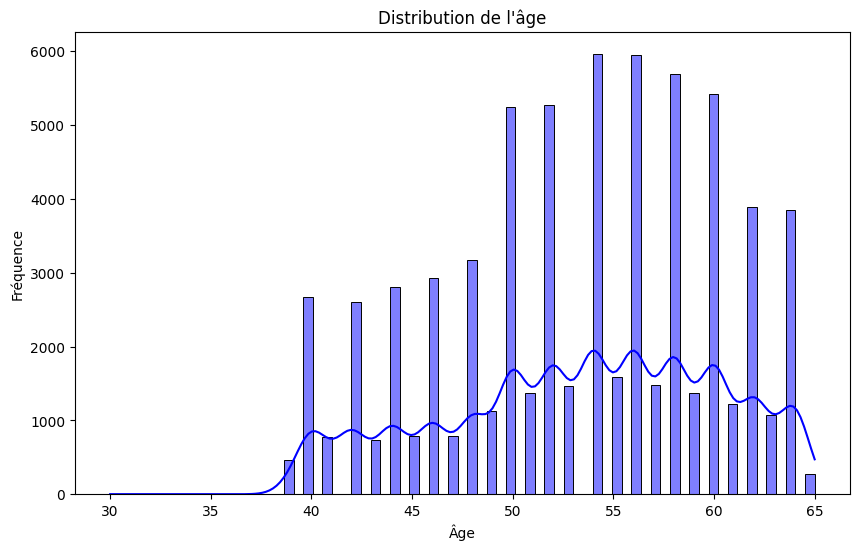

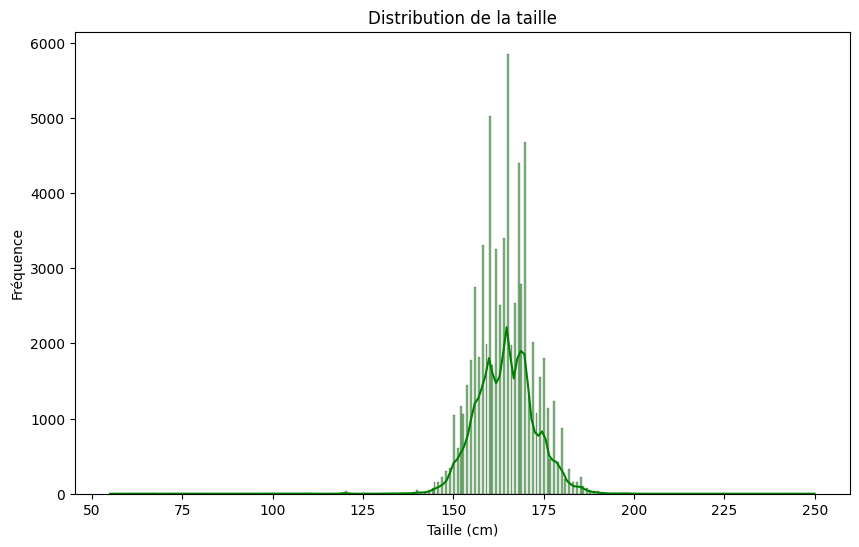

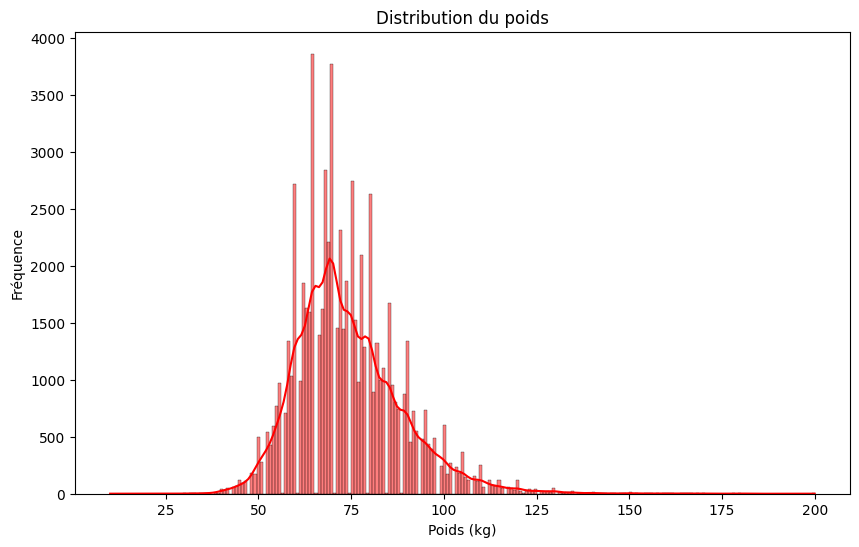

In [19]:
# Distribution de l'âge
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='blue')
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

# Distribution de la taille
plt.figure(figsize=(10, 6))
sns.histplot(df['height'], kde=True, color='green')
plt.title('Distribution de la taille')
plt.xlabel('Taille (cm)')
plt.ylabel('Fréquence')
plt.show()

# Distribution du poids
plt.figure(figsize=(10, 6))
sns.histplot(df['weight'], kde=True, color='red')
plt.title('Distribution du poids')
plt.xlabel('Poids (kg)')
plt.ylabel('Fréquence')
plt.show()

Je cherche en suite des relations entre mes variables

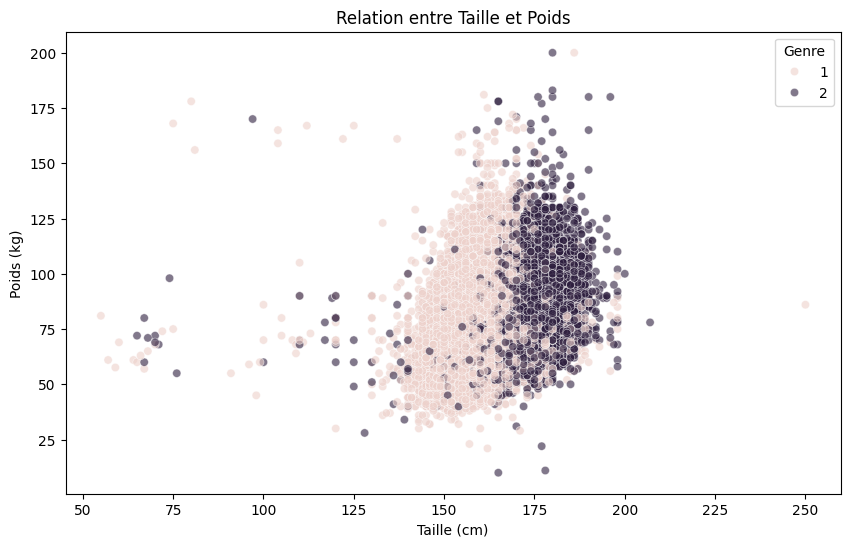

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height', y='weight', data=df, hue='gender', alpha=0.6)
plt.title('Relation entre Taille et Poids')
plt.xlabel('Taille (cm)')
plt.ylabel('Poids (kg)')
plt.legend(title='Genre')
plt.show()

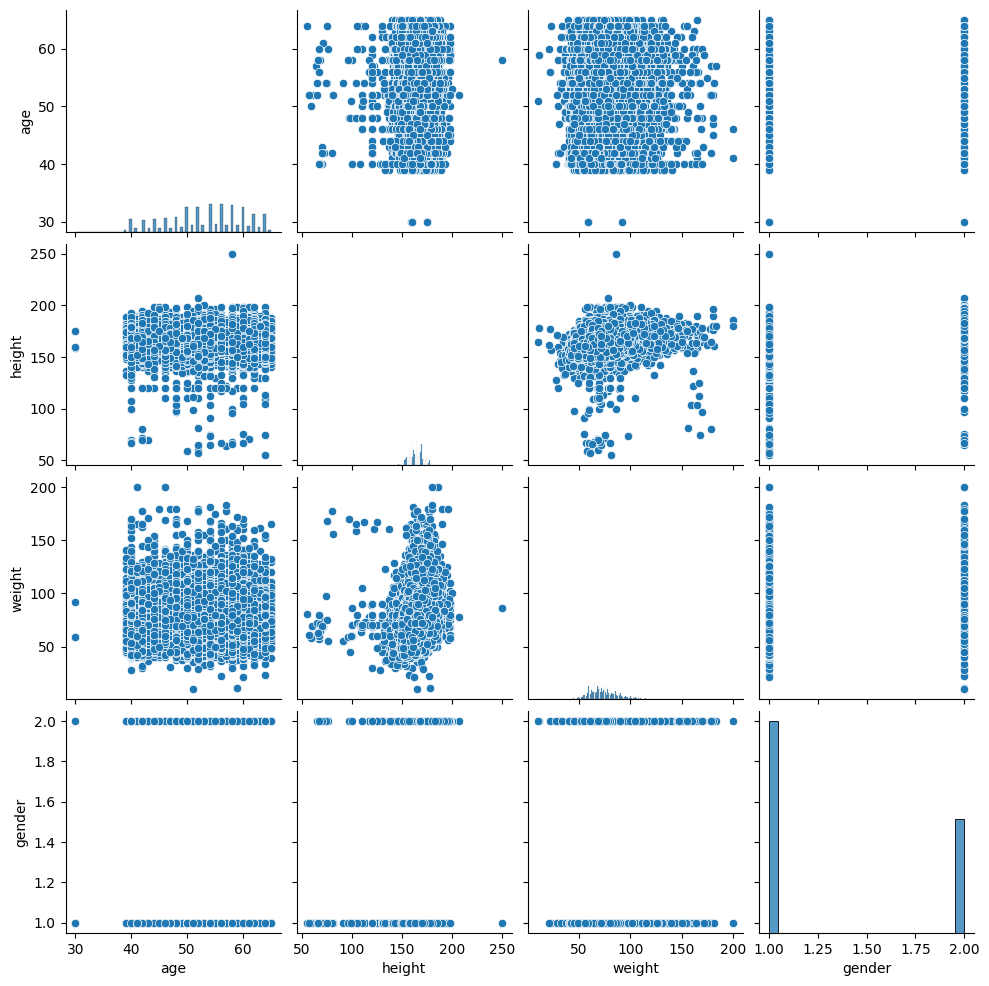

In [21]:
sns.pairplot(df[['age', 'height', 'weight', 'gender']])
plt.show()

Avant tout, je veut voir la distribution du genre en fonction de l'âge dans mon dataset.

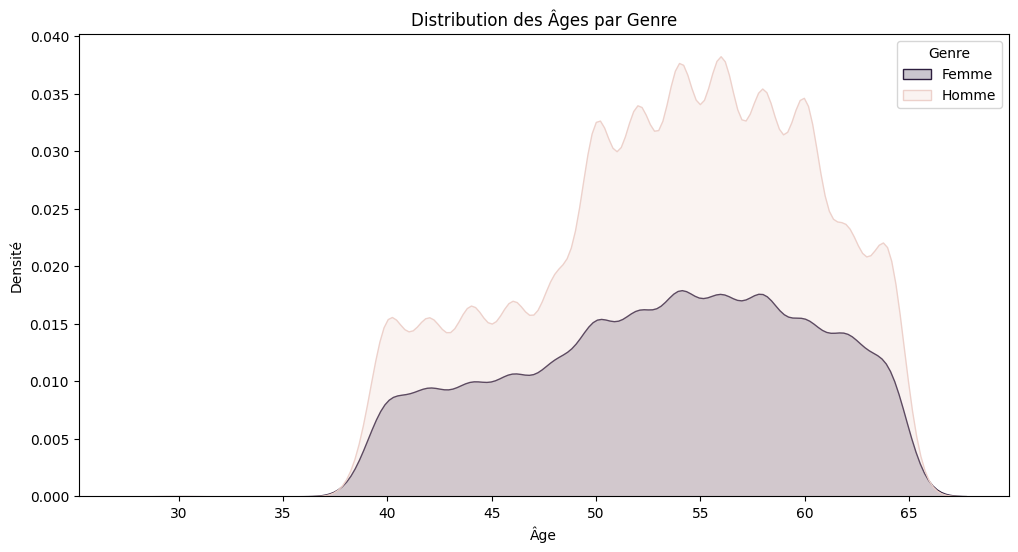

In [22]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='age', hue='gender', fill=True)
plt.title('Distribution des Âges par Genre')
plt.xlabel('Âge')
plt.ylabel('Densité')
plt.legend(title='Genre', labels=['Femme', 'Homme'])
plt.show()

Je cherche a voir la distribution de taux de cholesterol chez les hommes et chez les femmes.

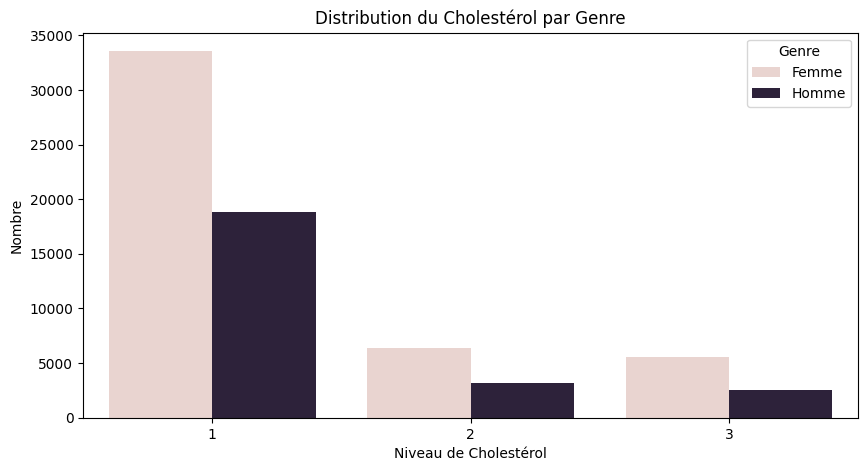

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(x='cholesterol', hue='gender', data=df)
plt.title('Distribution du Cholestérol par Genre')
plt.xlabel('Niveau de Cholestérol')
plt.ylabel('Nombre')
plt.legend(title='Genre', labels=['Femme', 'Homme'])
plt.show()

Nous pouvons constater que les femmes sont plus sujettes à développer du cholesterol.  
Pour approfondir, je vais chercher l'évolution du taux de cholesterol chez les femmes et chez les hommes en fonction de leurs âges.

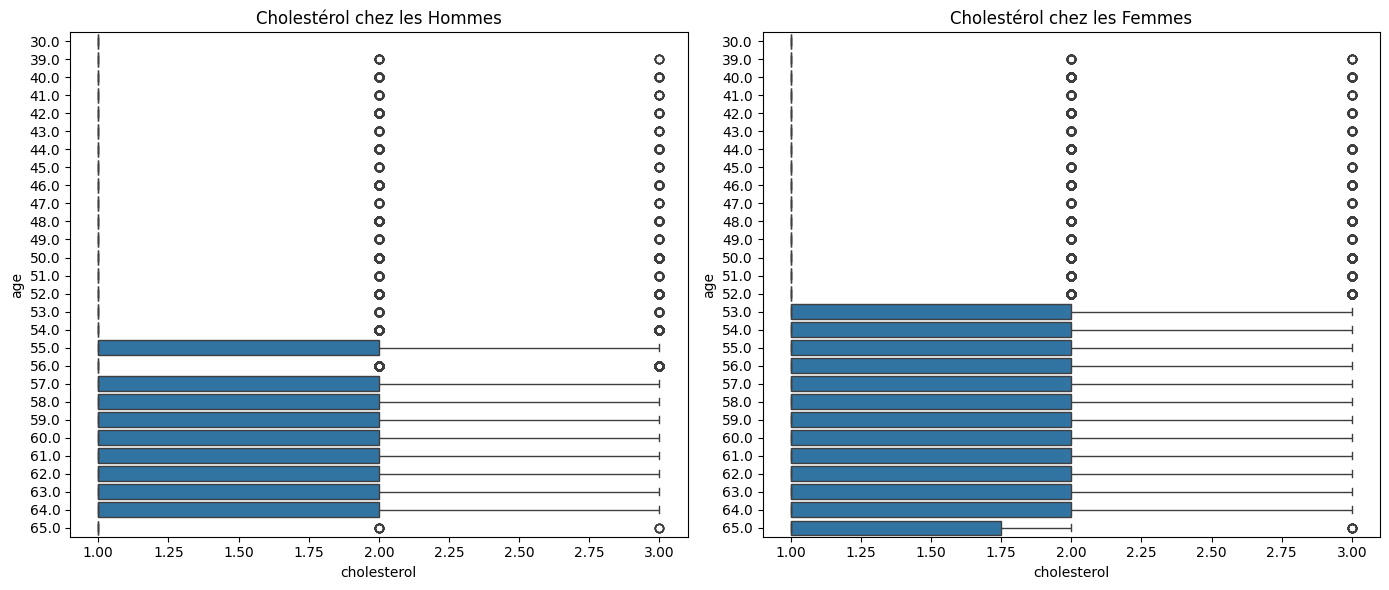

In [24]:
df_male = df[df['gender'] == 2]
df_female = df[df['gender'] == 1]

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='cholesterol', y='age', data=df_male, orient='h')
plt.title('Cholestérol chez les Hommes')

plt.subplot(1, 2, 2)
sns.boxplot(x='cholesterol', y='age', data=df_female, orient='h')
plt.title('Cholestérol chez les Femmes')

plt.tight_layout()
plt.show()


Je cherche maintenant a voir la distribution du taux de glucose en fonction du genre.

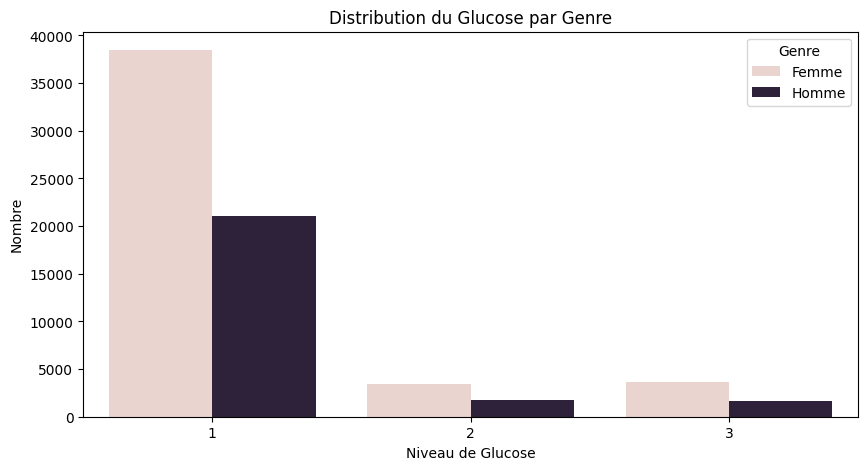

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(x='gluc', hue='gender', data=df)
plt.title('Distribution du Glucose par Genre')
plt.xlabel('Niveau de Glucose')
plt.ylabel('Nombre')
plt.legend(title='Genre', labels=['Femme', 'Homme'])
plt.show()

Là encore, nous pouvons voir que les femmes ont plus tendance à avoir des taux de glucose élevés. Je vais faire de même que pour le cholesterol et voir l'évolution de cette variable en ajoutant la variable d'âge. 

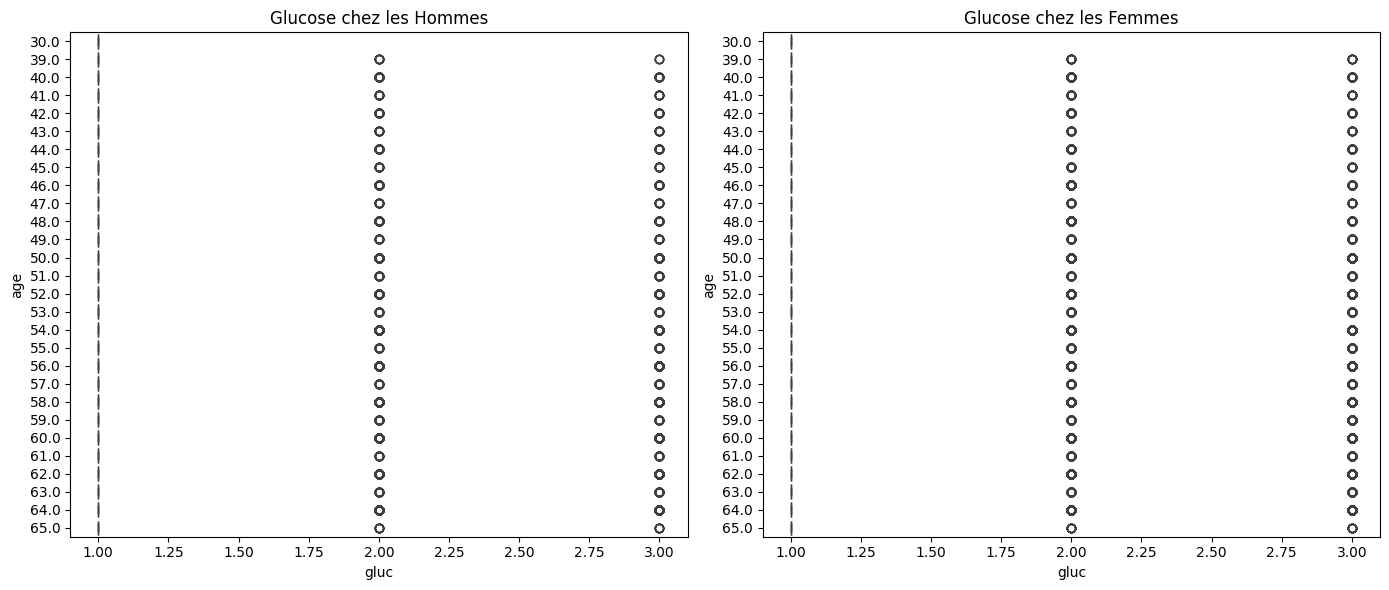

In [26]:
df_male = df[df['gender'] == 2]
df_female = df[df['gender'] == 1]

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='gluc', y='age', data=df_male, orient='h')
plt.title('Glucose chez les Hommes')

plt.subplot(1, 2, 2)
sns.boxplot(x='gluc', y='age', data=df_female, orient='h')
plt.title('Glucose chez les Femmes')

plt.tight_layout()
plt.show()

Je cherche maintenant a visualiser la relation entre la consommation d'alcool et le taux de glucose.

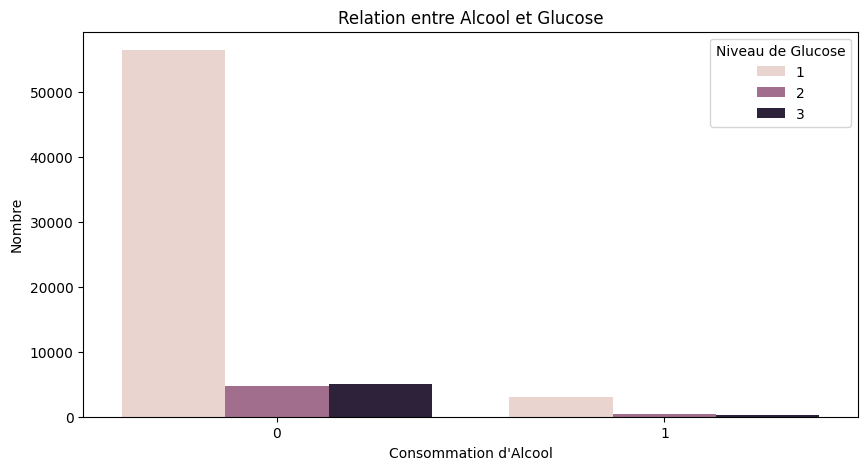

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(x='alco', hue='gluc', data=df)
plt.title('Relation entre Alcool et Glucose')
plt.xlabel('Consommation d\'Alcool')
plt.ylabel('Nombre')
plt.legend(title='Niveau de Glucose')
plt.show()

Nous pouvons constater que les personnes qui ne consomment pas d'alcool ont tendance à avoir un taux de glucose normal. Cependant, la consommation d'alcool ne veut pas dire qu'un sujet aura un taux de glucose élevé ou très élevé.  
Pour approfondir, je vais aussi vérifier si la consommation d'alcool peut avoir une influence sur la pression artérielle.

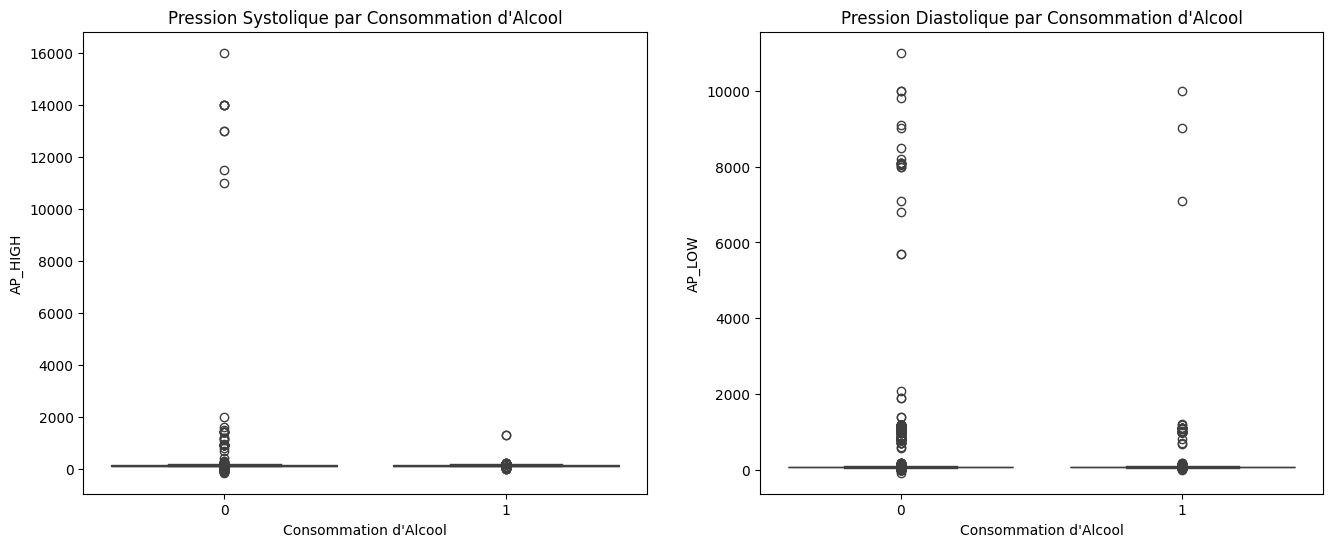

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x='alco', y='ap_hi', data=df, ax=ax[0])
ax[0].set_title('Pression Systolique par Consommation d\'Alcool')
ax[0].set_xlabel('Consommation d\'Alcool')
ax[0].set_ylabel('AP_HIGH')

sns.boxplot(x='alco', y='ap_lo', data=df, ax=ax[1])
ax[1].set_title('Pression Diastolique par Consommation d\'Alcool')
ax[1].set_xlabel('Consommation d\'Alcool')
ax[1].set_ylabel('AP_LOW')
plt.show()

Je vais maintenant chercher la relation entre la consommation d'alcool et le taux de cholesterol.

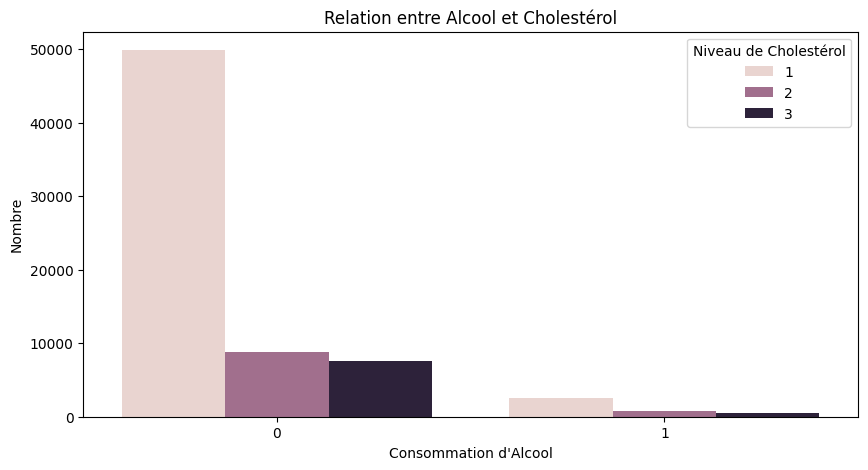

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x='alco', hue='cholesterol', data=df)
plt.title('Relation entre Alcool et Cholestérol')
plt.xlabel('Consommation d\'Alcool')
plt.ylabel('Nombre')
plt.legend(title='Niveau de Cholestérol')
plt.show()

Tout comme pour le glucose, on peut constater que les sujets qui ne consomment pas d'alcool ont un taux de cholesterol normal et que ceux qui consomment de l'alcool n'ont pas forcément des taux de cholesterol élevés ou très élevés. 

Je fais maintenant une analyse sur la relation entre le tabagisme et le taux de glucose

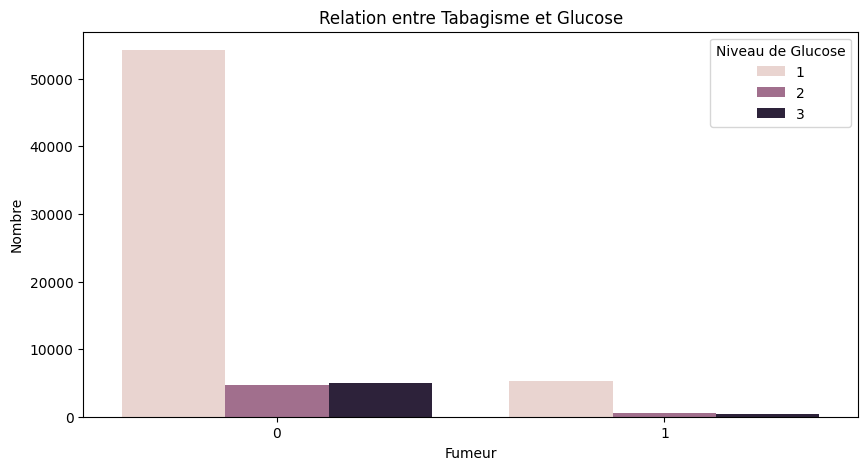

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(x='smoke', hue='gluc', data=df)
plt.title('Relation entre Tabagisme et Glucose')
plt.xlabel('Fumeur')
plt.ylabel('Nombre')
plt.legend(title='Niveau de Glucose')
plt.show()

Encore une fois nous pouvons constater que les non fumeurs ont un taux de glucose normal mais que le tabagisme n'influe pas sur le taux de glucose. On va maintenant faire la même chose pour la relation entre le tabagisme et le cholesterol.

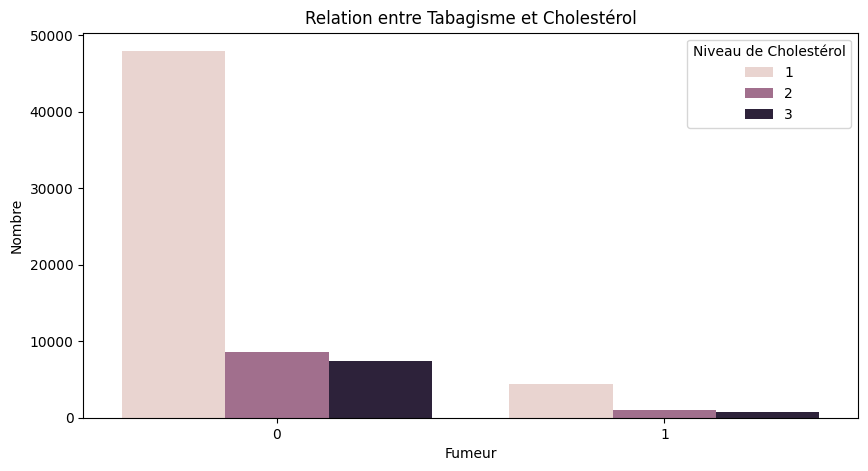

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(x='smoke', hue='cholesterol', data=df)
plt.title('Relation entre Tabagisme et Cholestérol')
plt.xlabel('Fumeur')
plt.ylabel('Nombre')
plt.legend(title='Niveau de Cholestérol')
plt.show()

Et nous pouvons toujours constater la même chose, nous allons donc chercher une relation entre le tabagisme et la pression artérielle moyenne.

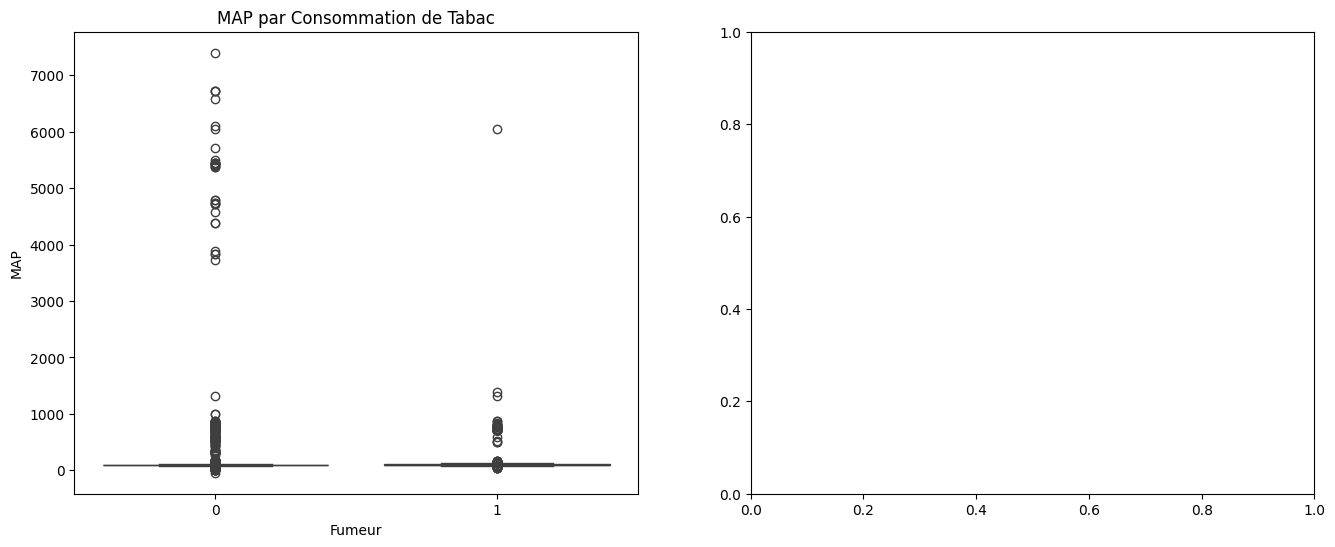

In [32]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))
sns.boxplot(x='smoke', y='MAP', data=df, ax=ax[0])
ax[0].set_title('MAP par Consommation de Tabac')
ax[0].set_xlabel('Fumeur')
ax[0].set_ylabel('MAP')
plt.show()

Maintenant je vais chercher une relation entre une activité physique et le taux de glucose.

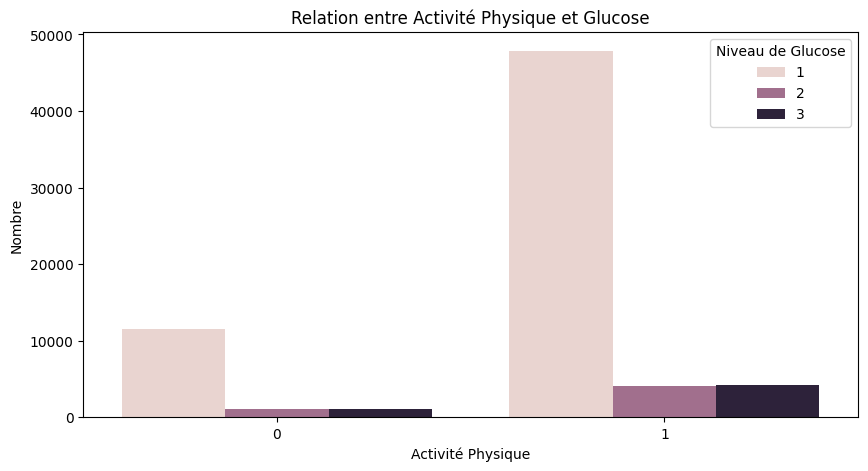

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(x='active', hue='gluc', data=df)
plt.title('Relation entre Activité Physique et Glucose')
plt.xlabel('Activité Physique')
plt.ylabel('Nombre')
plt.legend(title='Niveau de Glucose')
plt.show()

Comme on pouvait s'y attendre, les personnes pratiquant une activité physique sont plus succeptibles d'avoir un bon taux de glucose. Cependant, dans ce dataset, les personnes ne pratiquant pas de sport ont aussi majoritairement un taux de glucose normal. On va faire la même chose mais pour la relation avec le cholesterol.

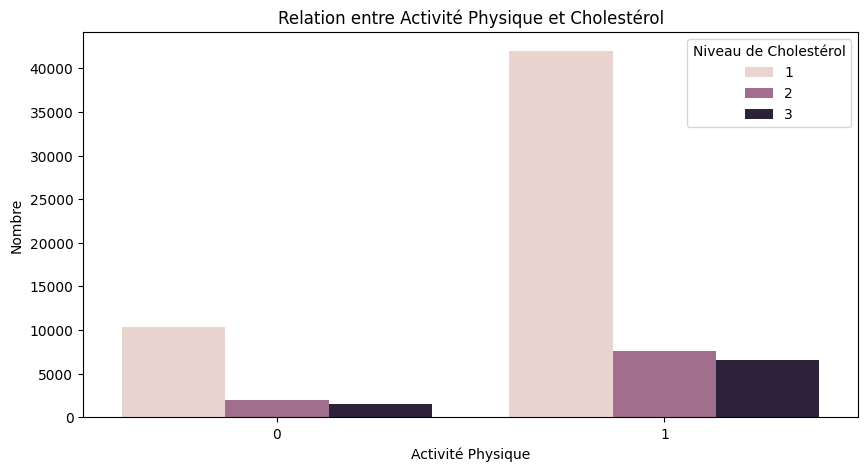

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(x='active', hue='cholesterol', data=df)
plt.title('Relation entre Activité Physique et Cholestérol')
plt.xlabel('Activité Physique')
plt.ylabel('Nombre')
plt.legend(title='Niveau de Cholestérol')
plt.show()

Et nous pouvons à nouveau tirer les mêmes conclusions. Nous allons maintenant vérifier l'incidence de la pratique d'une activité physique sur la pression artérielle. 

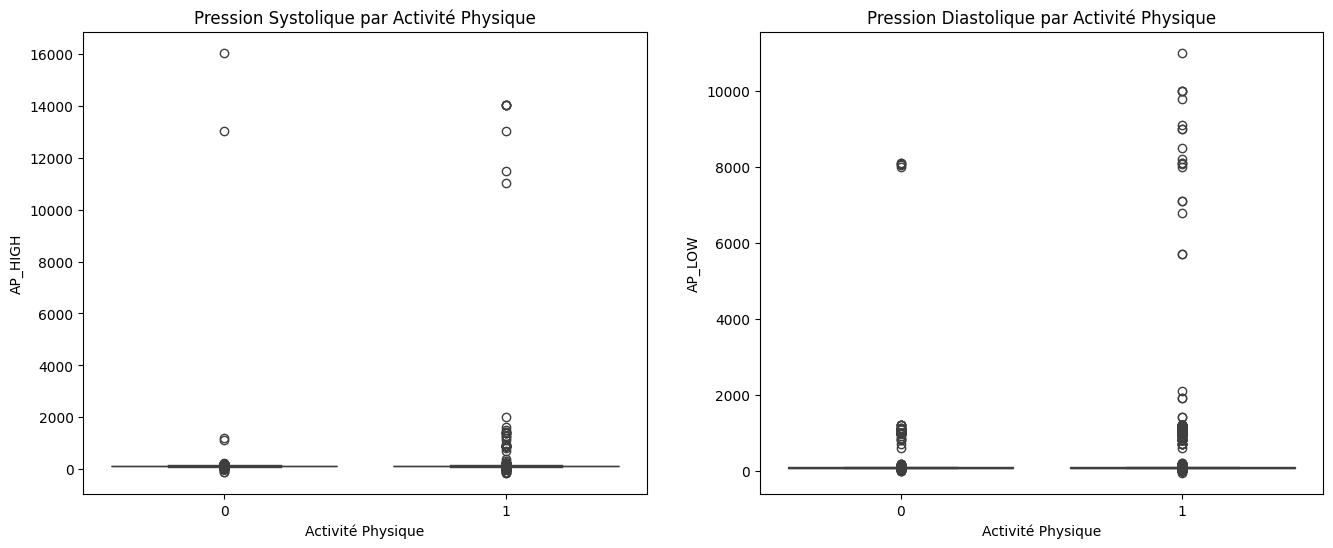

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x='active', y='ap_hi', data=df, ax=ax[0])
ax[0].set_title('Pression Systolique par Activité Physique')
ax[0].set_xlabel('Activité Physique')
ax[0].set_ylabel('AP_HIGH')

sns.boxplot(x='active', y='ap_lo', data=df, ax=ax[1])
ax[1].set_title('Pression Diastolique par Activité Physique')
ax[1].set_xlabel('Activité Physique')
ax[1].set_ylabel('AP_LOW')
plt.show()

Nous allons maintenant regarder la distribution de fumeurs par genre dans le dataset.

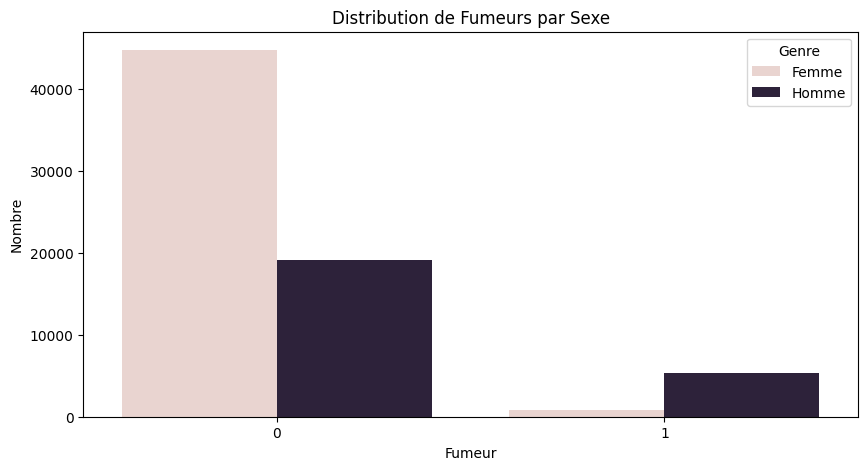

In [36]:
plt.figure(figsize=(10, 5))
sns.countplot(x='smoke', hue='gender', data=df)
plt.title('Distribution de Fumeurs par Sexe')
plt.xlabel('Fumeur')
plt.ylabel('Nombre')
plt.legend(title='Genre', labels=['Femme', 'Homme'])
plt.show()

Nous pouvons constater que les hommes sont plus fumeurs que les femmes. On va maintenant faire la même chose avec l'alcool.

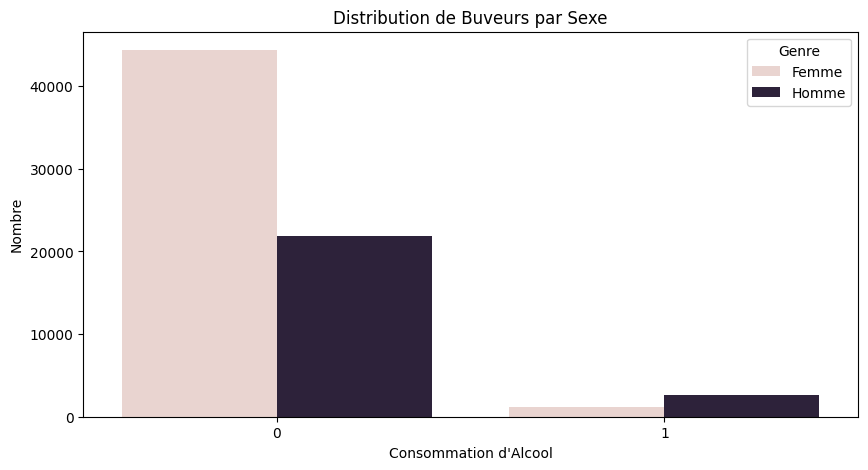

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(x='alco', hue='gender', data=df)
plt.title('Distribution de Buveurs par Sexe')
plt.xlabel('Consommation d\'Alcool')
plt.ylabel('Nombre')
plt.legend(title='Genre', labels=['Femme', 'Homme'])
plt.show()

Et là encore, les hommes ont plus tendance à consommer de l'alcool que les femmes. 

Je vais maintenant chercher la distribution des sportifs en fonction de l'âge et du genre. 

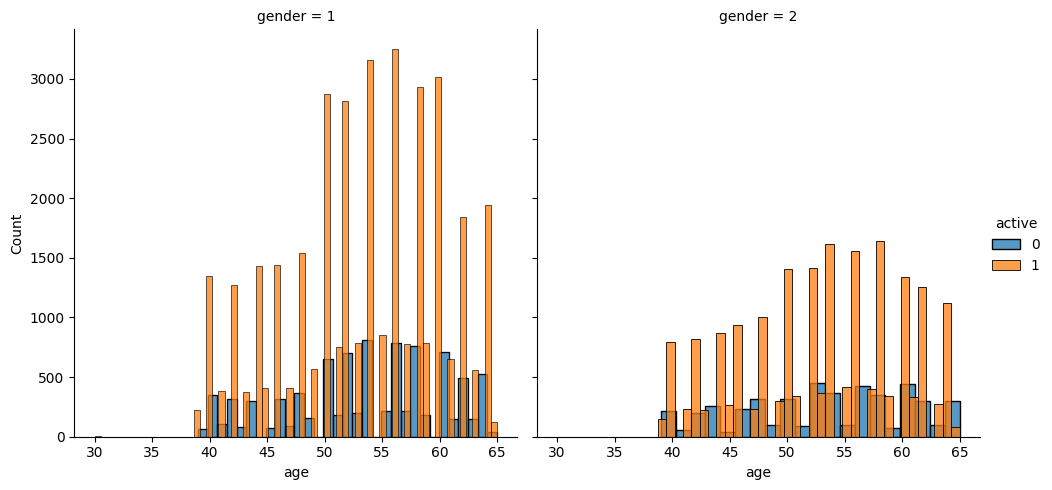

In [38]:
g = sns.FacetGrid(df, col="gender", hue="active", height=5)
g.map_dataframe(sns.histplot, "age")
g.add_legend()
plt.show()

Je cherche maintenant a voir la distribution des pressions artérielles en fonction de l'âge et du genre.

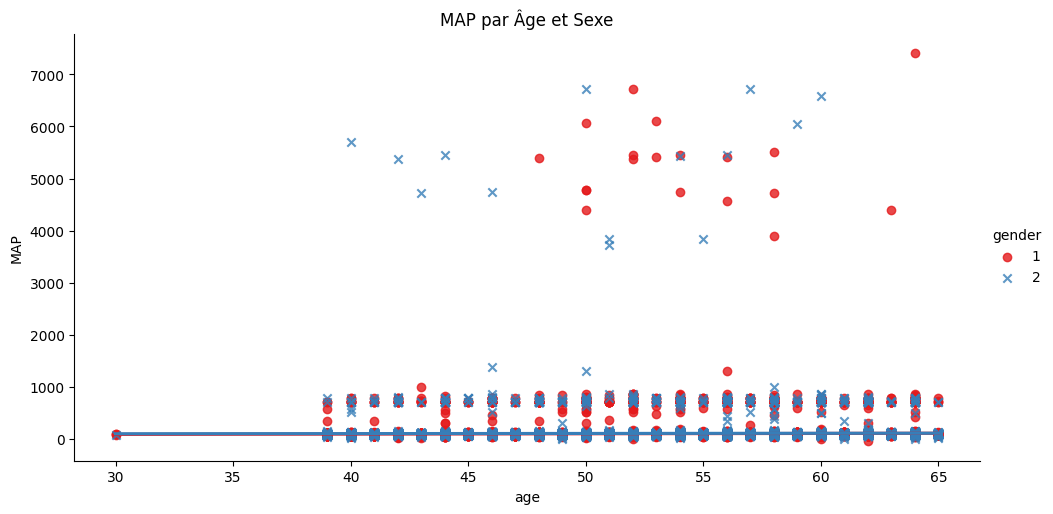

In [39]:
sns.lmplot(x='age', y='MAP', hue='gender', data=df, markers=["o", "x"], palette="Set1", aspect=2)
plt.title('MAP par Âge et Sexe')
plt.show()

Je fais une analyse des variables catégoriques.

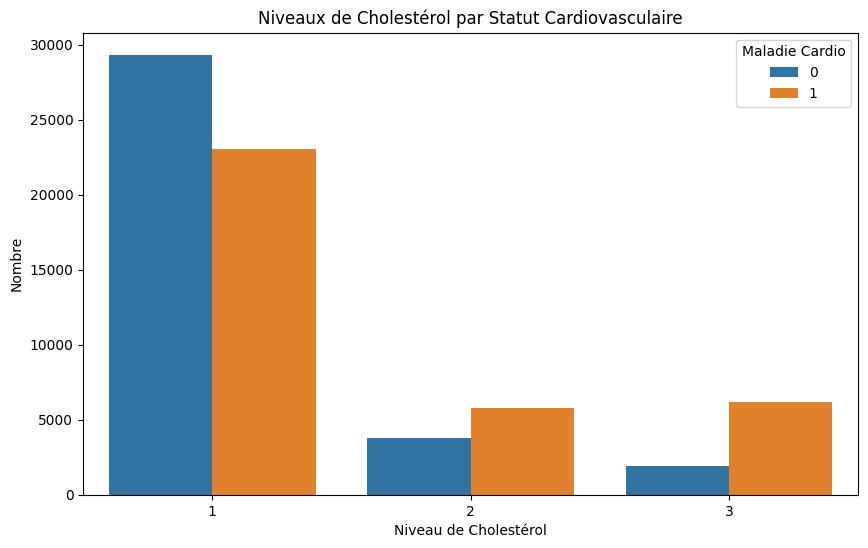

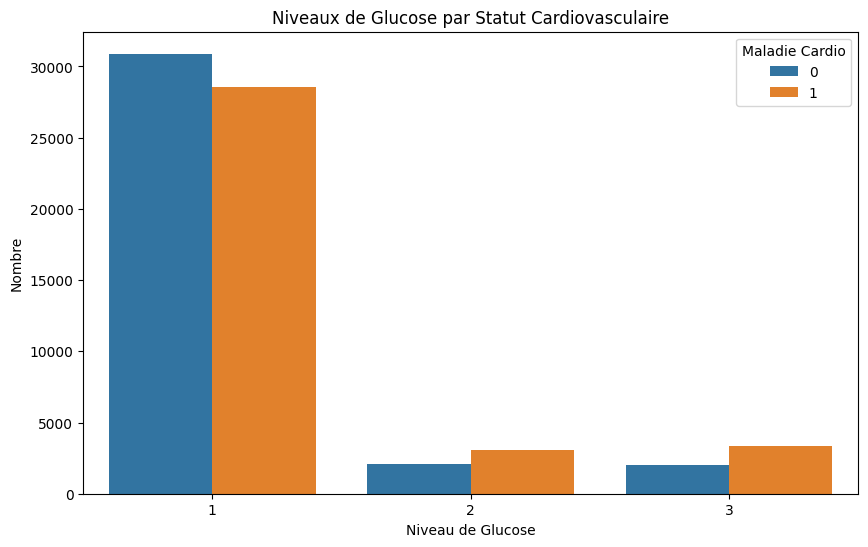

In [40]:
# Diagramme à barres pour le cholestérol
plt.figure(figsize=(10, 6))
sns.countplot(x='cholesterol', data=df, hue='cardio')
plt.title('Niveaux de Cholestérol par Statut Cardiovasculaire')
plt.xlabel('Niveau de Cholestérol')
plt.ylabel('Nombre')
plt.legend(title='Maladie Cardio')
plt.show()

# Diagramme à barres pour le glucose
plt.figure(figsize=(10, 6))
sns.countplot(x='gluc', data=df, hue='cardio')
plt.title('Niveaux de Glucose par Statut Cardiovasculaire')
plt.xlabel('Niveau de Glucose')
plt.ylabel('Nombre')
plt.legend(title='Maladie Cardio')
plt.show()

Je vais maintenant faire une analyse de la relation entre l'IMC et la variable cible.

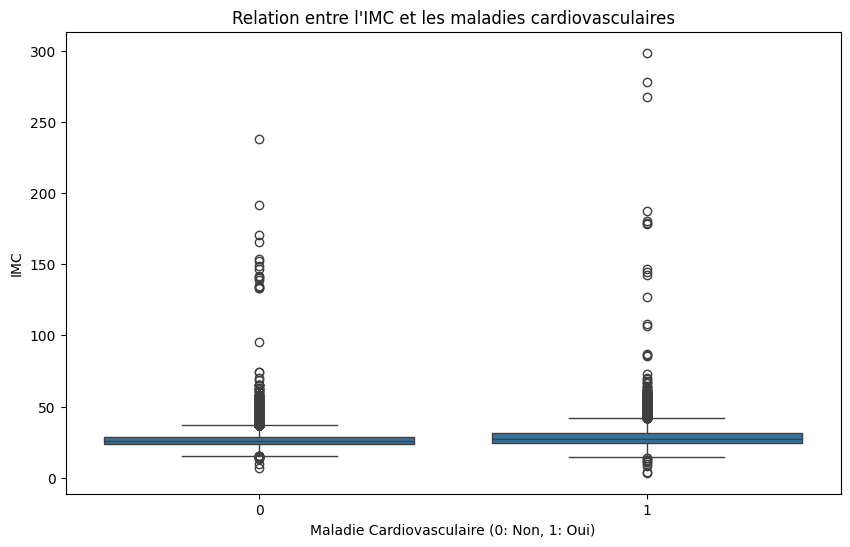

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='IMC', data=df)
plt.title('Relation entre l\'IMC et les maladies cardiovasculaires')
plt.xlabel('Maladie Cardiovasculaire (0: Non, 1: Oui)')
plt.ylabel('IMC')
plt.show()

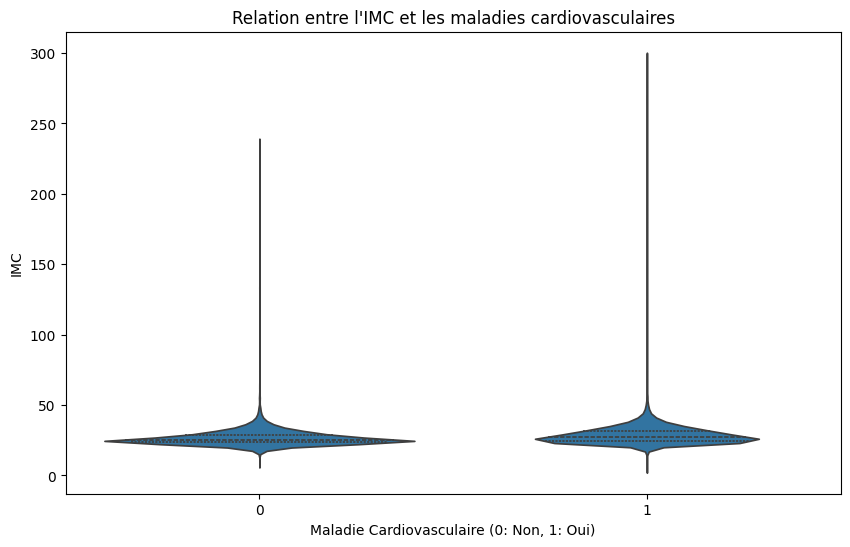

In [42]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='cardio', y='IMC', data=df, inner="quartile")
plt.title('Relation entre l\'IMC et les maladies cardiovasculaires')
plt.xlabel('Maladie Cardiovasculaire (0: Non, 1: Oui)')
plt.ylabel('IMC')
plt.show()

Je fais en suite une corrélation entre la MAP, l'IMC, les pressions diastoliques et systoliques ainsi que la variable cible.

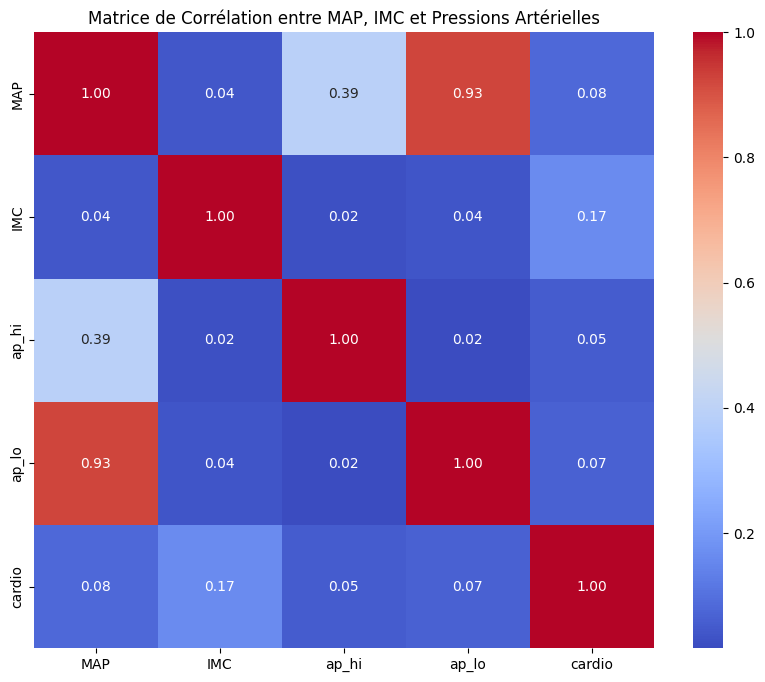

In [43]:
correlation_matrix = df[['MAP', 'IMC', 'ap_hi', 'ap_lo', 'cardio']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation entre MAP, IMC et Pressions Artérielles')
plt.show()


Nous pouvons constater que la pression diastolique a une forte corrélation avec la MAP.

Je vais maintenant chercher la distribution de MAP via la variable cible.

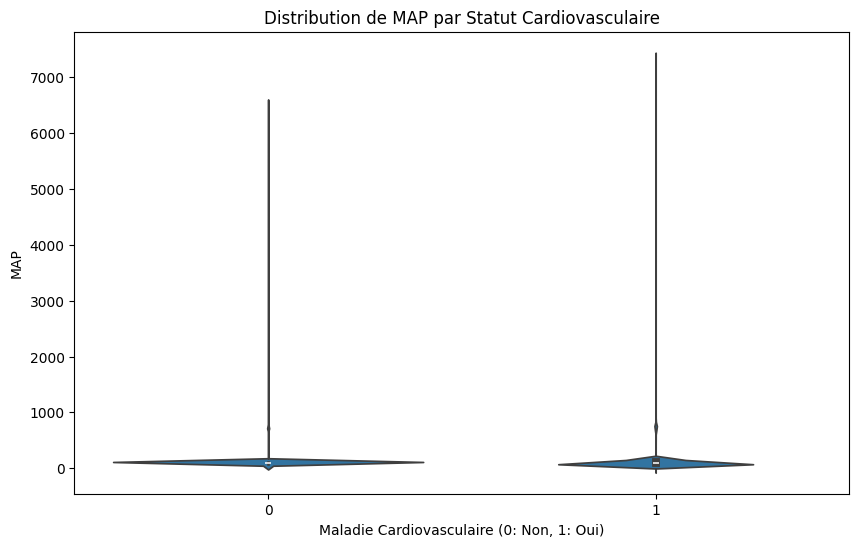

In [44]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='cardio', y='MAP', data=df)
plt.title('Distribution de MAP par Statut Cardiovasculaire')
plt.xlabel('Maladie Cardiovasculaire (0: Non, 1: Oui)')
plt.ylabel('MAP')
plt.show()

Nous pouvons voir que les personnes atteintes d'une maladie cardio vasculaire ont une MAP un peu plus élevée.  

Je regarde maintenant l'effet combiné de l'IMC, du tabagisme, de l'alcool et de l'activité physique sur la MAP.

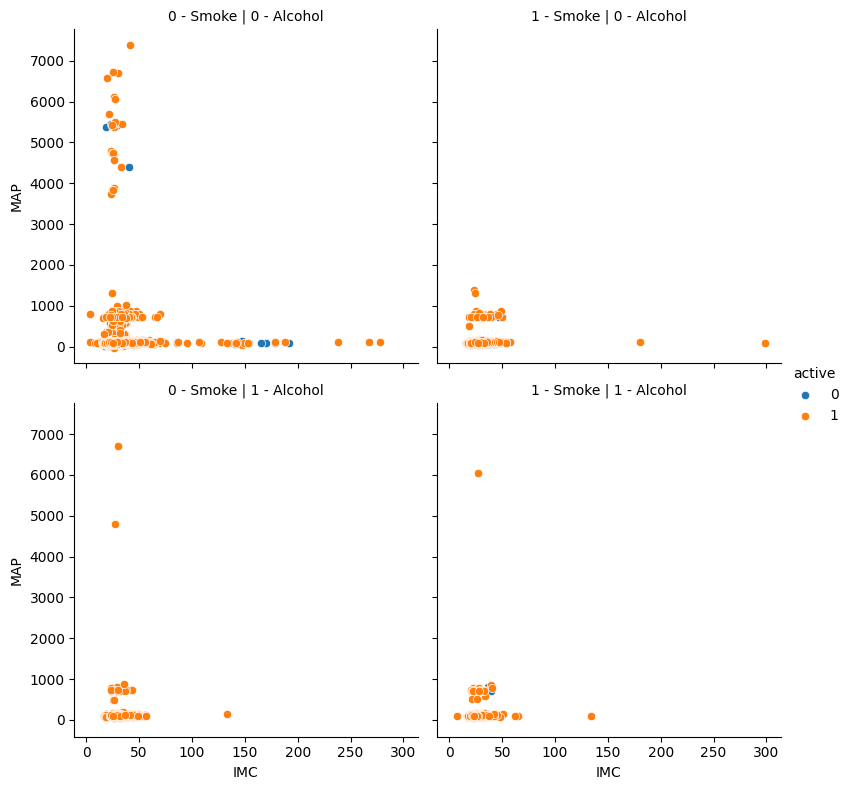

In [45]:
g = sns.FacetGrid(df, col='smoke', row='alco', hue='active', height=4)
g.map(sns.scatterplot, 'IMC', 'MAP')
g.add_legend()
g.set_titles("{col_name} - Smoke | {row_name} - Alcohol")
plt.show()

### Application de la Régression Logistique avec Scikit-Learn

Maintenant que mon analyse est terminée, je vais appliquer l'algorithme de Régression Logistique avec les outils de la librairie Scikit-Learn. 
Dans un premier temps je prépare mes données.

Dans un premier temps, je remappe les valeurs pour la variable 'gender'. Dans le dataset, 1 correspond au genre 'female' et 2 correspond au genre 'male'. J'en fais donc un encodage binaire simple afin que ce soit plus approprié lors de l'utilisation de l'algorithme.
En suite, je supprime la colonne 'AT' que j'avais ajouté et qui correspond à la tension artérielle est qui est une chaine de caractère, elle sera donc inutilisable.

Pour la sélection des features et pour la variable cible, je crée un nouveau dataframe pour X en enlevant la variable cible et en prenant donc toutes les autres variables (moins 'AT') et pour y j'attribue la variable cible. y contiendra donc les étiquettes que le modèle essaiera de prédire.  

Je divise en suite les données en ensembles d'entrainement et de test. 'test_size = 0.2' signifie que 20% des données seront utilisées comme un ensemble de test et les 80% restants serviront à l'entraînement du modèle.  

Pour terminer, je crée une instance de StandardScaler qui est un outil de prétraitement qui normalise les features en soustrayant la moyenne et en divisant par l'écart-type. Ceci va standardiser les features afin qu'elles aient une moyenne de 0 et une variance de 1, ce qui est souvent une pratique recommandée pour les algorithmes de machine learning.  

La ligne suivante ajuste le scaler aux données d'entrainement puis les transforme. Donc le scaler calcule la moyenne et l'écart-type sur X_train et utilise ces valeurs pour le transformer.  

Puis la dernière ligne transforme les données de test en utilisant les moyennes et ecarts-types calculés à partir des données d'entrainement.  

sources:  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  


In [46]:
# Je m'assure que les données sont nettoyées et préparées
df['gender'] = df['gender'].map({1: 0, 2: 1})
df.drop(columns=['AT'], inplace=True)

# Je sélectionne les features X = toutes les variables sauf la cible, y = cible
X = df.drop('cardio', axis=1)
y = df['cardio']
print(X)

# Je sépare mes données en données d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Je normalise mes données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

          id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  50.0       1     168    62.0    110     80            1     1   
1          1  55.0       0     156    85.0    140     90            3     1   
2          2  52.0       0     165    64.0    130     70            3     1   
3          3  48.0       1     169    82.0    150    100            1     1   
4          4  48.0       0     156    56.0    100     60            1     1   
...      ...   ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  53.0       1     168    76.0    120     80            1     1   
69996  99995  62.0       0     158   126.0    140     90            2     2   
69997  99996  52.0       1     183   105.0    180     90            3     1   
69998  99998  61.0       0     163    72.0    135     80            1     2   
69999  99999  56.0       0     170    72.0    120     80            2     1   

       smoke  alco  active        IMC         MAP  

En suite, j'ajuste le modèle de Régression Logistique.  

Tout d'abord j'insancie la classe 'LogisticRegression' puis j'entraîne le modèle sur les données d'entrainement.

In [47]:
model = LogisticRegression()

model.fit(X_train_scaled, y_train)

LogisticRegression()

Puis j'évalue mon modèle.  

J'utilise la fonction predict de Scikit-Learn afin d'obtenir les prédictions du modèle pour les données de test (X_test_scaled) qui ont été au préalable normalisées. La méthode applique le modèle de régression logistique entraîné de Scikit-Learn aux features de test pour prédire la classe ou l'étiquette pour chaque observation du jeu de test. 'y_pred', le résultat, sera un tableau contenant les prédictions de la classe pour chaque observation.  

La fonction 'accuracy_score' calcule la précision du modèle qui correspond à la proportion de prédictions correctes par rapport au total des prédictions faites. 'y_test' contient les vraies étiquettes de la target et 'y_pred' contient les étiquettes prédites par le modèle.  

La fonction 'confusion_matrix' permet d'afficher une matrice de confusion, qui est une table qui permet de visualiser la performance d'un algorithme de classification.  

'classification_report' est une fonction qui fournit un rapport textuel qui montre les principales métriques de classification par classe: 
- 'precision' -> proportion de prédictions positives qui sont vraiment correctes  
    True Positive (TP) / (TP + False Positive (FP))
- 'recall' -> est la capacité du classifieur à trouver toutes les instances positives  
    TP / (TP + False Negative (FN))
- 'f1-score' -> moyenne harmonique de la précision et du rappel. Permet donc de combiner la précision et le rappel (precision & recall) en une seule métrique, ce qui donne un meilleur sens de la performance générale du modèle. 
- 'support' -> nombre d'occurence de chaque classe dans 'y_true'  

source: https://scikit-learn.org/stable/modules/model_evaluation.html

In [48]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7237142857142858
Confusion Matrix:
 [[5364 1624]
 [2244 4768]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.73      6988
           1       0.75      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000



Nous pouvons voir que la précision (accuracy) est de 72,37%, ce qui est un bon résultat car cela veut dire que le modèle à classé correctement presque 73% des observations.  
Pour la matrice de confusion, nous pouvons constater que le modèle à correctement prédit 5364 observations, de la classe 0 et 4768 observations de la classe 1. Et qu'il a mal classé 2244 observations de la classe 0 et 1624 observations de la classe 1.  
Nous avons en suite le rapport de classification, qui fournit des mesures de précision, de rappel et le score F1 pour chaque classe (0 et 1), ainsi que des mesures moyennes (macro avg, weighted avg) pour évaluer la performance globale du modèle.
- **Précision** : La proportion de prédictions positives correctes parmi toutes les prédictions positives. Pour la classe 0, elle est de 71%, et pour la classe 1, elle est de 75%.
- **Rappel (Recall)** : La proportion de vrais positifs identifiés parmi toutes les valeurs réellement positives. Pour la classe 0, il est de 77%, et pour la classe 1, il est de 68%.
- **Score F1** : La moyenne harmonique de la précision et du rappel. Il s'agit d'une mesure de la précision du modèle qui prend en compte à la fois la précision et le rappel.  

souce: https://scikit-learn.org/stable/modules/model_evaluation.html

Et pour terminer j'ajuste les hyper paramètres.

Tout d'abord, je stocke dans la variable 'param_grid' une grille de valeurs des hyperparamètres à tester. Dans ce cas, 'C' et 'solver'.  
- 'C' est un paramètre de régularisation, des valeurs plus petites indiquent une régularisation plus forte.  
- 'solver' est un algorithme a utiliser dans un problème d'optimisation.  

Les deux lignes suivantes me permettent de faire une recherche d'hyperparamètres avec validation croisée.  
GridSearchCV est une classe de Scikit-Learn qui va faire une recherche exhaustive sur une grille d'hyperparamètres donnée. Elle entraîne et évalue un modèle pour chaque combinaison d'hyperparamètres en utilisant la validation croisée.  

source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [49]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
}

grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, verbose=1, scoring='accuracy')

grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

y_pred_best = grid.predict(X_test_scaled)
print("Accuracy with best parameters:", accuracy_score(y_test, y_pred_best))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'C': 100, 'solver': 'newton-cg'}
Best cross-validation score: 0.72
Accuracy with best parameters: 0.7237857142857143


Les meilleurs hyperparamètres trouvés par la recherche sont C=100 et solver='newton-cg'.  
Cela signifie que le modèle de régression logistique obtient les meilleurs résultats lorsque le paramètre de régularisation 'C' est réglé à 100 et que l'algorithme de résolution des problèmes d'optimisation est défini sur 'newton-cg'.  

### Création de ma propre classe pour une régression logistique

Pour créer ma propre class de Régression Logistique, sans utiliser de librairie voici comment j'ai procédé.  

Tout d'abord, j'initialise les attributs de la classe. A savoir le taux d'apprentissage, le nombre d'itérations, le poids, le biais ainsi qu'une liste vide pour stocker les pertes.  
- Poids = coefficients multipliés par les caractéristiques d'entrée pour obtenir la sortie du modèle.  
- Biais = terme constant ajouté à la somme pondérée des caractéristiques d'entrée.

Je crée en suite une fonction d'activation, ici une fonction sigmoïde. J'ai fais ce choix plutôt qu'une fonction d'activation linéaire car cette dernière comporte deux problèmes majeurs:  
- Il est impossible d'utiliser la rétro propagation puisque la dérivée de la fonction est une constante et n'a pas de relation avec l'input x.  
- Toutes les couches d'un réseau neuronal collapseront en une seule si une fonction d'activation linéaire est utilisée.  

La fonction sigmoïde prend n'importe quelle valeur en qu'entrée et sortie entre 0 et 1. Plus l'entrée est élevée, plus la valeur de sortie sera proche de 1 et inversement.  

Je crée en suite ma fonction de perte. Elle va calculer la perte du modèle en utilisant la fonction de perte de l'entropie croisée binaire (Binary Cross-Entropy) dont la formule est la suivante:  
BCE = $- \frac {1}{N} \sum_{i = 0}^{N} y_i * log(\check{y_i}) + (1 - y_i) * log(1 - \check{y_i})$  

Cette méthode évalue dans quelle mesure mon algorithme modélise mon dataset. Si mes prédictions sont totalement fausses, ma fonction de perte en sortie aura un chiffre plus haut.  

La fonction 'free_forward' calcule la propagation avant en multipliant les caractéristiques d'entrées (X) avec le poids (weights) en ajoutant le biais (bias) et en appliquant la fonction sigmoïde.  

En suite, j'ai ma fonction 'fit' qui entraîne le modèle en utilisant la descente de gradient. Elle itère sur le nombre spécifié d'itérations, calcule les gradients et met à jour les poids et le biais en fonction du taux d'apprentissage.  

La déscente de gradient est un algorithme qui est utilisé pour optimiser la fonction de coût ou l'erreur du modèle. Elle est utilisée pour toruver la valeur minimum possible du modèle.  

Puis pour terminer, ma fonction predict, qui prend en entrée les caractéristiques X et prédit les classes en appliquant la fonction sigmoïde à la sortie de la propagation avant, puis en utilisant un seuil de décision pour binariser les prédictions.

In [52]:
class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []
         
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)

    def feed_forward(self,X):
        z = np.dot(X, self.weights) + self.bias
        A = self._sigmoid(z)
        return A

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

# Gradient descent
        for _ in range(self.n_iters):
            A = self.feed_forward(X)
            self.losses.append(self.compute_loss(y,A))
            dz = A - y
            dw = (1 / n_samples) * np.dot(X.T, dz)
            db = (1 / n_samples) * np.sum(dz)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        threshold = .5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
        
        return np.array(y_predicted_cls)

Je teste maintenant mon algorithme sur mon jeu de données

In [53]:
model_custom = LogisticRegressionCustom(learning_rate=0.001, n_iters=1000)

model_custom.fit(X_train_scaled, y_train)

y_pred_custom = model_custom.predict(X_test_scaled)

Puis j'évalue mes résultats.

In [54]:
# Prédiction sur les données de test
y_pred_custom = model_custom.predict(X_test_scaled)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred_custom)
print("Accuracy:", accuracy)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_custom)
print("Confusion Matrix:\n", conf_matrix)

# Rapport de classification
class_report = classification_report(y_test, y_pred_custom)
print("Classification Report:\n", class_report)


Accuracy: 0.6512857142857142
Confusion Matrix:
 [[4938 2050]
 [2832 4180]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.71      0.67      6988
           1       0.67      0.60      0.63      7012

    accuracy                           0.65     14000
   macro avg       0.65      0.65      0.65     14000
weighted avg       0.65      0.65      0.65     14000



Je décide d'analyser ces résultats afin de les interpréter.  
Tout d'abord, la matrice de confusion.

In [55]:
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()

print("True Negatives:", true_negatives)
print("False Positives:", false_positives)
print("False Negatives:", false_negatives)
print("True Positives:", true_positives)

True Negatives: 4938
False Positives: 2050
False Negatives: 2832
True Positives: 4180


Puis je vérifie la distribution des classes.

In [56]:
class_distribution = df['cardio'].value_counts()
print("Distribution des classes :\n", class_distribution)

Distribution des classes :
 cardio
0    35021
1    34979
Name: count, dtype: int64


### Interprétation des résultats

Pour évaluer les performances de mon modèle de régression logistique, j'ai utilisé plusieurs métriques de classification couramment utilisées : l'accuracy, la matrice de confusion, le rapport de classification comprenant la précision (precision), le rappel (recall), et le F1-score. Voici une interprétation détaillée de ces résultats :  

Accuracy : 65.13%  

L'accuracy est la proportion de prédictions correctes parmi le nombre total de prédictions. Dans notre cas, environ 65.13% des prédictions de notre modèle sont correctes. Bien que l'accuracy soit une mesure intuitive et simple à comprendre, elle peut être trompeuse si les classes sont déséquilibrées. Cependant, notre distribution des classes est relativement équilibrée, ce qui rend l'accuracy pertinente mais insuffisante seule pour évaluer la performance du modèle.  

Matrice de Confusion :  

La matrice de confusion permet de visualiser la performance de notre algorithme en termes de vrais positifs (TP), vrais négatifs (TN), faux positifs (FP), et faux négatifs (FN).

- True Negatives (TN) : 4938
- False Positives (FP) : 2050
- False Negatives (FN) : 2832
- True Positives (TP) : 4180  

Rapport de Classification :  

Précision pour la classe 0 : 64%

Cela signifie que 64% des instances prédites comme étant de classe 0 sont effectivement de classe 0.  

Rappel pour la classe 0 : 71%

Cela signifie que 71% des instances de classe 0 sont correctement identifiées par le modèle.  

F1-score pour la classe 0 : 67%

Le F1-score est la moyenne harmonique de la précision et du rappel, indiquant un équilibre entre les deux.  

Précision pour la classe 1 : 67%

Cela signifie que 67% des instances prédites comme étant de classe 1 sont effectivement de classe 1.  

Rappel pour la classe 1 : 60%

Cela signifie que 60% des instances de classe 1 sont correctement identifiées par le modèle.  

F1-score pour la classe 1 : 63%

Indique également un équilibre entre la précision et le rappel pour la classe 1.

### Prédiction pour Arthur

Je dois maintenant faire une prédiction pour savoir si Arthur est un sujet à risques cardio-vasculaires. Voici les données d'Arthur:  
- age -> 53 ans
- smoke -> 1
- physical_activity -> 1
- height -> 175
- weight -> 85
- cholesterol -> 2
- glucose -> 1
- ap_high -> 50%
- ap_low -> 50-75%  

Je vais faire ces prédictions tout d'abord avec le modèle de scikit-learn puis avec ma propre classe.

Tout d'abord, je prépare les données d'Arthur.

In [69]:
ap_high_75th_percentile = df['ap_hi'].quantile(0.75)
ap_low_75th_percentile = df['ap_lo'].quantile(0.75)

ap_high_avg = df['ap_hi'].mean()
ap_low_avg = df['ap_lo'].mean()
print(ap_low_avg)
print(ap_high_avg)
map_avg = ap_low_avg + (1/3) * (ap_high_avg - ap_low_avg)
arthur_imc = 85 / (175 * 175)

print(f"Moyenne systolique (AP_HIGH): {ap_high_avg}, Moyenne diastolique (AP_LOW): {ap_low_avg}, MAP: {map_avg}")

96.63041428571428
128.8172857142857
Moyenne systolique (AP_HIGH): 128.8172857142857, Moyenne diastolique (AP_LOW): 96.63041428571428, MAP: 107.35937142857142


Puis je ré-instancie le modèle et les hyperparamètres car sans ça, le fit ne fonctionnait pas. 

In [61]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
}

grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, verbose=1, scoring='accuracy')

grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

Je passe les données d'Arthur au modèle et je lance la prédiction. 

In [72]:
arthur_data = np.array([0, 53 * 365, 1, 175, 85, 120, 85, 2, 1, 1, 1, 1, arthur_imc, map_avg]).reshape(1, -1)
arthur_data_scaled = scaler.transform(arthur_data)

arthur_prediction = grid.predict(arthur_data_scaled)

print(f"Prédiction pour Arthur (Scikit-Learn): {'à risque' if arthur_prediction[0] == 1 else 'pas à risque'}")


Prédiction pour Arthur (Scikit-Learn): à risque


c:\wamp64\www\cardio-vasc-risks\cardio-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Puis je lance aussi celle avec ma propre classe.

In [73]:
model_custom = LogisticRegressionCustom(learning_rate=0.01, n_iters=1000)
model_custom.fit(X_train_scaled, y_train)

arthur_prediction_custom = model_custom.predict(arthur_data_scaled)

print(f"Prédiction pour Arthur (Modèle personnalisé): {'à risque' if arthur_prediction_custom[0] == 1 else 'pas à risque'}")


Prédiction pour Arthur (Modèle personnalisé): à risque


Dans les deux cas nous pouvons voir qu'Arthur est un sujet à risque de maladies cardio-vasculaires.